In [6]:
## SETUP ##
import time
from random import randint
import pandas as pd
import numpy as np
import timeit
from datetime import datetime, timedelta
from pytrends.request import TrendReq
from itertools import chain
import seaborn as sns
import string
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

## Import selected word_list

In [19]:
with open('GTdata/word_list copy.txt', 'r') as f:
    Word_lst = f.read().splitlines() 

## Parse weekly data

In [7]:
pytrend = TrendReq()

In [8]:
weekly = []
count = 0
for word in Word_lst:
    
    pytrend.build_payload(kw_list=[word], timeframe = 'today 5-y', cat = 16, geo = 'US')
    time.sleep(randint(5,10))
    weekly.append(pytrend.interest_over_time().iloc[:,:1].to_json())
    count += 1 
    print('Finished ' + str(count) + ' : ' + word)

Finished 1 : most expensive stock
Finished 2 : donate to trump
Finished 3 : boom town
Finished 4 : frugal living
Finished 5 : budget deficit
Finished 6 : continued health care benefit program
Finished 7 : americans for prosperity
Finished 8 : healthcare
Finished 9 : campaign contributions
Finished 10 : rich people
Finished 11 : prosperity economics
Finished 12 : federal deficit
Finished 13 : treasure hunt
Finished 14 : benefit definition
Finished 15 : healthcare fine
Finished 16 : dividend aristocrats
Finished 17 : tsp beneficiary form
Finished 18 : do you capitalize presidential election
Finished 19 : debt clock
Finished 20 : apple stock
Finished 21 : community bank
Finished 22 : charitable contributions
Finished 23 : intervention definition
Finished 24 : most expensive apartment
Finished 25 : health care reform
Finished 26 : most profitable companies
Finished 27 : the hustle
Finished 28 : most expensive
Finished 29 : allied waste
Finished 30 : county waste
Finished 31 : expense repor

Finished 260 : capitalism
Finished 261 : divine intervention
Finished 262 : forbes list
Finished 263 : how much did trump inherit
Finished 264 : best buy best buy
Finished 265 : angel fire
Finished 266 : trump bankrupt
Finished 267 : news reporter goes ghetto
Finished 268 : radical party
Finished 269 : successful habits
Finished 270 : riches man in the world
Finished 271 : forbes
Finished 272 : bankrupt companies
Finished 273 : murdock charitable trust
Finished 274 : national deficit
Finished 275 : hillary clinton charity
Finished 276 : la casa del patron
Finished 277 : the guide
Finished 278 : ceo compensation
Finished 279 : legal weed
Finished 280 : expense report
Finished 281 : successful people
Finished 282 : subsidy definition
Finished 283 : credit default swaps
Finished 284 : tribune bankruptcy
Finished 285 : luxury penthouse
Finished 286 : election guide
Finished 287 : clinton giustra enterprise partnership
Finished 288 : thrifty liquor shreveport
Finished 289 : rod of ruin
Fini

Finished 509 : underwood tariff
Finished 510 : political party quiz
Finished 511 : cobra arra subsidy extension
Finished 512 : berkeley electric cooperative
Finished 513 : ebitda
Finished 514 : fabulessly frugal
Finished 515 : donald trump intervention
Finished 516 : net profit
Finished 517 : berkeley cooperative
Finished 518 : group health cooperative
Finished 519 : the advantage
Finished 520 : what is aristocracy
Finished 521 : bonus army definition
Finished 522 : community health care
Finished 523 : noel fieldings luxury comedy
Finished 524 : thrift
Finished 525 : accure
Finished 526 : economy
Finished 527 : donald trump bankrupt
Finished 528 : poverty in america
Finished 529 : bacon shortage
Finished 530 : inherit the wind
Finished 531 : jobless rate
Finished 532 : how much does the us owe china
Finished 533 : affirmative action
Finished 534 : bonus depreciation
Finished 535 : gift tax
Finished 536 : donate to hillary
Finished 537 : black on black crime
Finished 538 : kate
Finished

## Remove observation ratio < 0.1

In [265]:
Weekly = [i for i in weekly if i != '{}']

In [266]:
new_weekly = []
for i in Weekly:
    df = pd.read_json(i)
    if sum(df.iloc[:,0] == 0)/df.shape[0] < 0.3:
        new_weekly.append(i)
    

In [267]:
ls = []
from string import punctuation
for j in new_weekly:
    j = j.split(':')[0]
    ls.append(''.join(i for i in j if i not in punctuation))

boom town


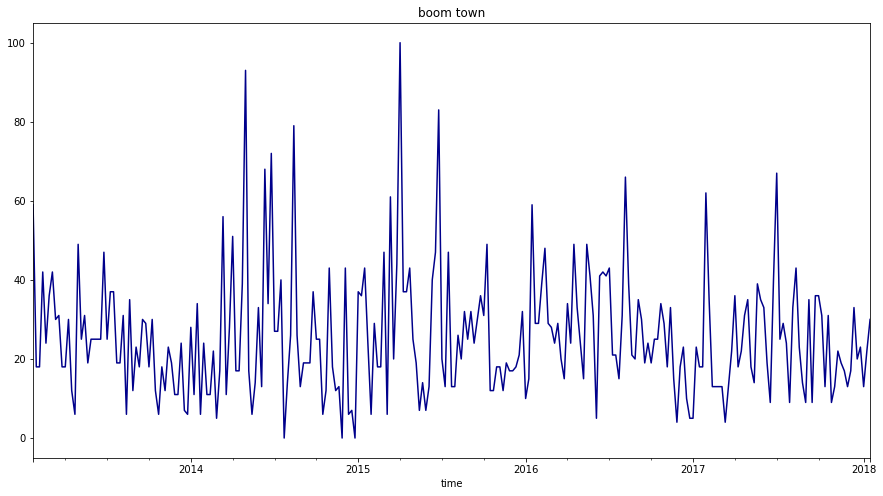

old colony memorial


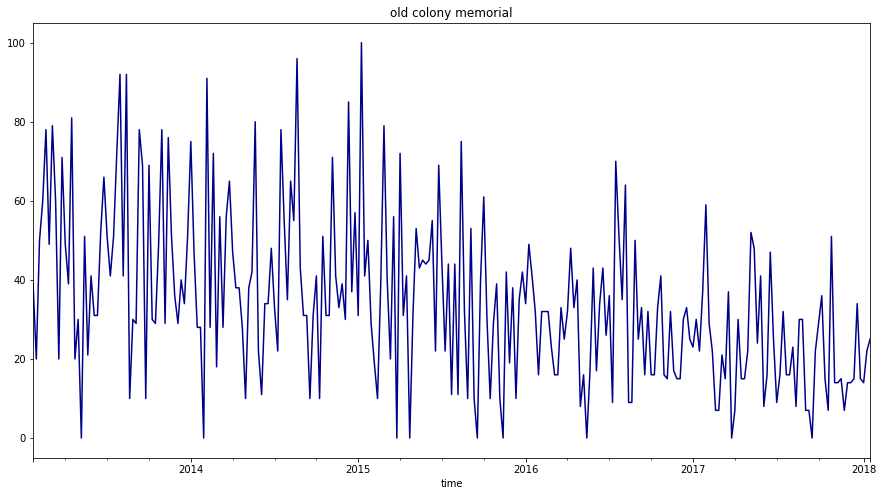

thrifty nickel


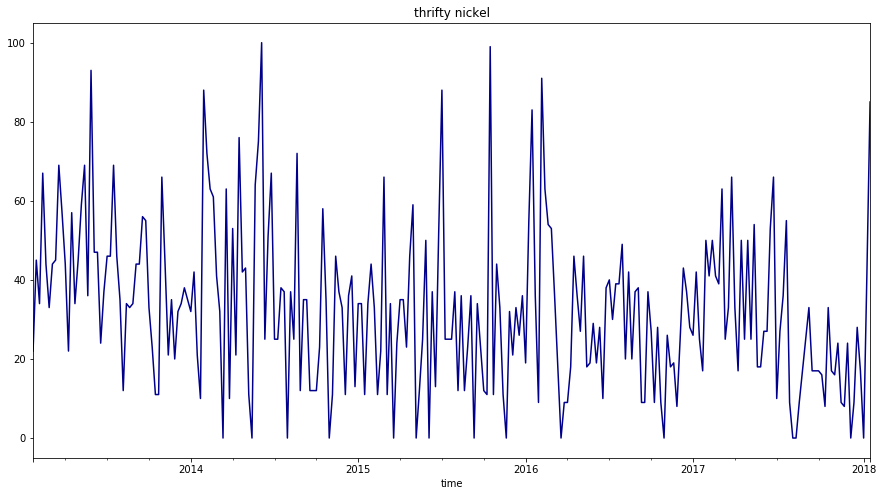

reactionary


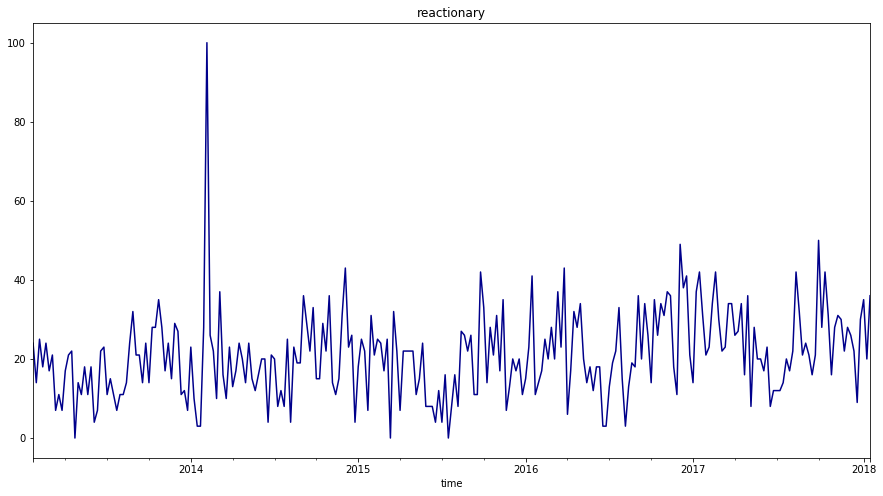

black gold


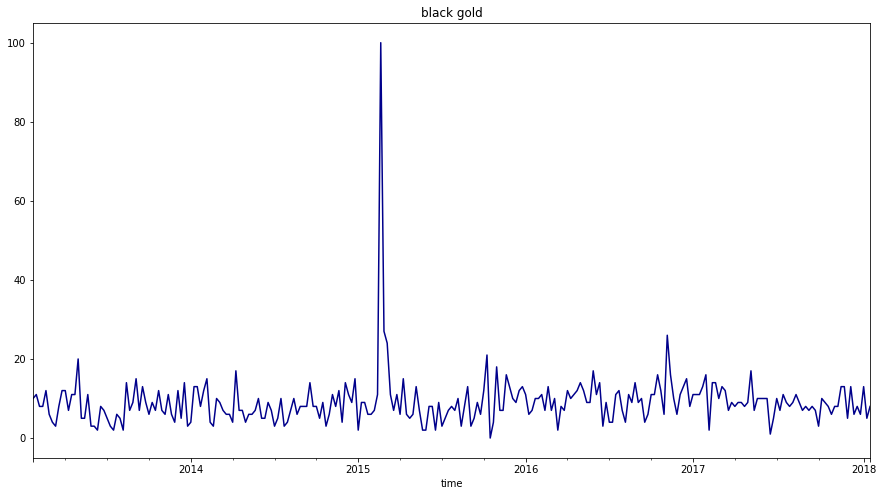

inflation definition


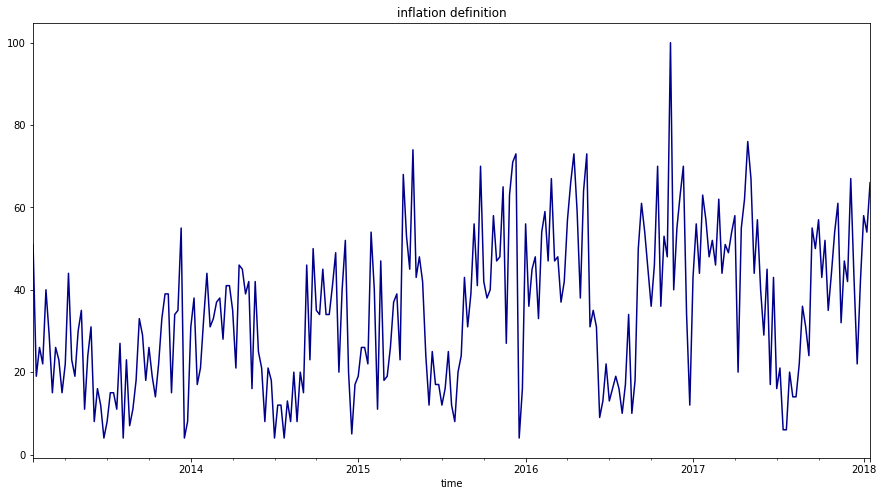

bums


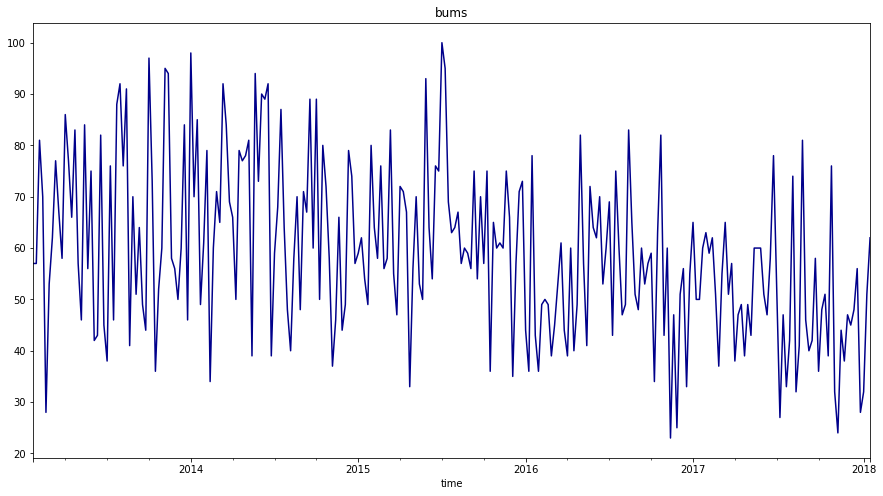

In [268]:
from pandas import Series
a = new_weekly
target = [i-1 for i in [1 , 25 ,103 ,195 ,197 ,273 ,275]]

for i in target:
    temp = pd.read_json(a[i]).reset_index()
    topic = temp.columns[1]
    print(topic)
    temp.columns = ['time','count']
    count =  np.array(temp['count'])
    count.astype(int)
    pp = Series(count, index= temp.time)
    plt.figure(figsize = (15,8))
    plt.title(str(topic))
    pp.plot(color = 'darkblue')
    plt.show()
# save_date
date = temp.index.tolist()


# Daily '2017-01-01 2017-09-05'

In [21]:
timeframe = '2017-01-01 2017-09-05'


In [11]:
pytrend.build_payload(kw_list = ['cryptocurrency'], timeframe = '2017-01-01 2017-09-05', cat = 16, geo = 'US')
series_queries = pytrend.related_queries()
series_queries = series_queries['cryptocurrency']['top']['query']


In [22]:
Word_lst = Word_lst + list(series_queries[:5])

In [24]:
daily = []
count = 0
for word in Word_lst:
    
    pytrend.build_payload(kw_list=[word], timeframe = timeframe, cat = 16, geo = 'US')
    time.sleep(randint(5,10))
    daily.append(pytrend.interest_over_time().iloc[:,:1].to_json())
    count += 1 
    print('Finished ' + str(count) + ' : ' + word)

Finished 1 : most expensive stock
Finished 2 : donate to trump
Finished 3 : boom town
Finished 4 : frugal living
Finished 5 : budget deficit
Finished 6 : continued health care benefit program
Finished 7 : americans for prosperity
Finished 8 : healthcare
Finished 9 : campaign contributions
Finished 10 : rich people
Finished 11 : prosperity economics
Finished 12 : federal deficit
Finished 13 : treasure hunt
Finished 14 : benefit definition
Finished 15 : healthcare fine
Finished 16 : dividend aristocrats
Finished 17 : tsp beneficiary form
Finished 18 : do you capitalize presidential election
Finished 19 : debt clock
Finished 20 : apple stock
Finished 21 : community bank
Finished 22 : charitable contributions
Finished 23 : intervention definition
Finished 24 : most expensive apartment
Finished 25 : health care reform
Finished 26 : most profitable companies
Finished 27 : the hustle
Finished 28 : most expensive
Finished 29 : allied waste
Finished 30 : county waste
Finished 31 : expense repor

Finished 260 : capitalism
Finished 261 : divine intervention
Finished 262 : forbes list
Finished 263 : how much did trump inherit
Finished 264 : best buy best buy
Finished 265 : angel fire
Finished 266 : trump bankrupt
Finished 267 : news reporter goes ghetto
Finished 268 : radical party
Finished 269 : successful habits
Finished 270 : riches man in the world
Finished 271 : forbes
Finished 272 : bankrupt companies
Finished 273 : murdock charitable trust
Finished 274 : national deficit
Finished 275 : hillary clinton charity
Finished 276 : la casa del patron
Finished 277 : the guide
Finished 278 : ceo compensation
Finished 279 : legal weed
Finished 280 : expense report
Finished 281 : successful people
Finished 282 : subsidy definition
Finished 283 : credit default swaps
Finished 284 : tribune bankruptcy
Finished 285 : luxury penthouse
Finished 286 : election guide
Finished 287 : clinton giustra enterprise partnership
Finished 288 : thrifty liquor shreveport
Finished 289 : rod of ruin
Fini

Finished 509 : underwood tariff
Finished 510 : political party quiz
Finished 511 : cobra arra subsidy extension
Finished 512 : berkeley electric cooperative
Finished 513 : ebitda
Finished 514 : fabulessly frugal
Finished 515 : donald trump intervention
Finished 516 : net profit
Finished 517 : berkeley cooperative
Finished 518 : group health cooperative
Finished 519 : the advantage
Finished 520 : what is aristocracy
Finished 521 : bonus army definition
Finished 522 : community health care
Finished 523 : noel fieldings luxury comedy
Finished 524 : thrift
Finished 525 : accure
Finished 526 : economy
Finished 527 : donald trump bankrupt
Finished 528 : poverty in america
Finished 529 : bacon shortage
Finished 530 : inherit the wind
Finished 531 : jobless rate
Finished 532 : how much does the us owe china
Finished 533 : affirmative action
Finished 534 : bonus depreciation
Finished 535 : gift tax
Finished 536 : donate to hillary
Finished 537 : black on black crime
Finished 538 : kate
Finished

In [26]:
DAILY = [i for i in daily if i != '{}']

In [91]:
new_Daily = []
remove = []
for i in DAILY:
    df = pd.read_json(i)
    if sum(df.iloc[:,0] == 0)/df.shape[0] < 0.4:
        new_Daily.append(i)
    else:
        remove.append(i)

In [92]:
ls = []
from string import punctuation
for j in new_Daily:
    j = j.split(':')[0]
    ls.append(''.join(i for i in j if i not in punctuation))

budget deficit


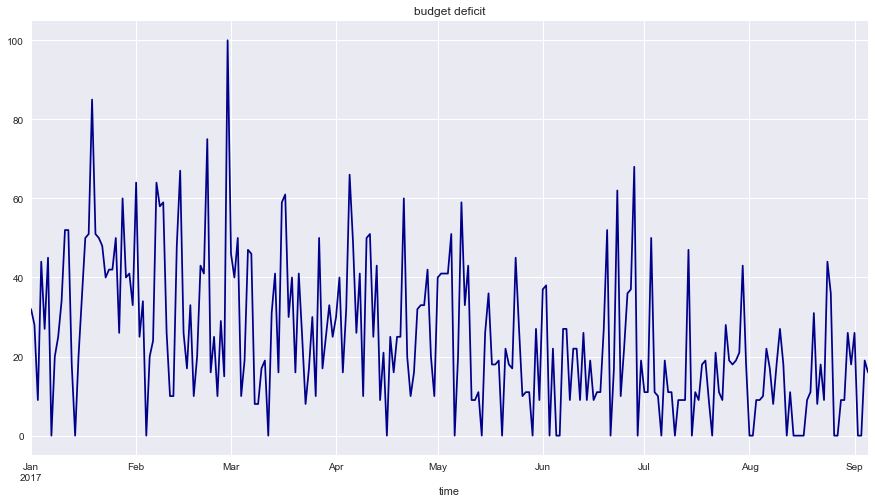

healthcare


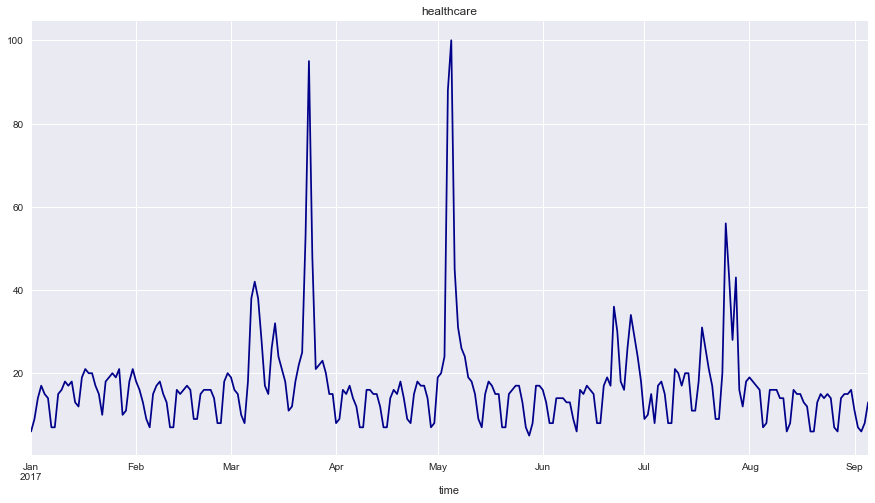

campaign contributions


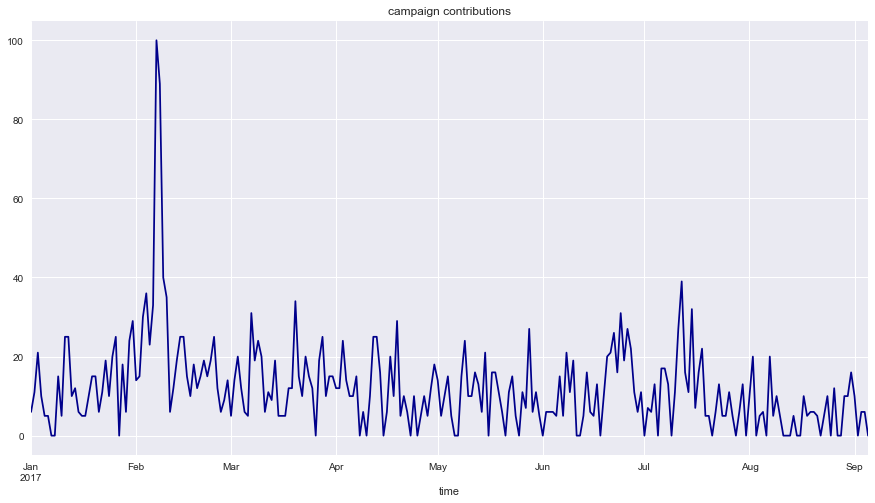

rich people


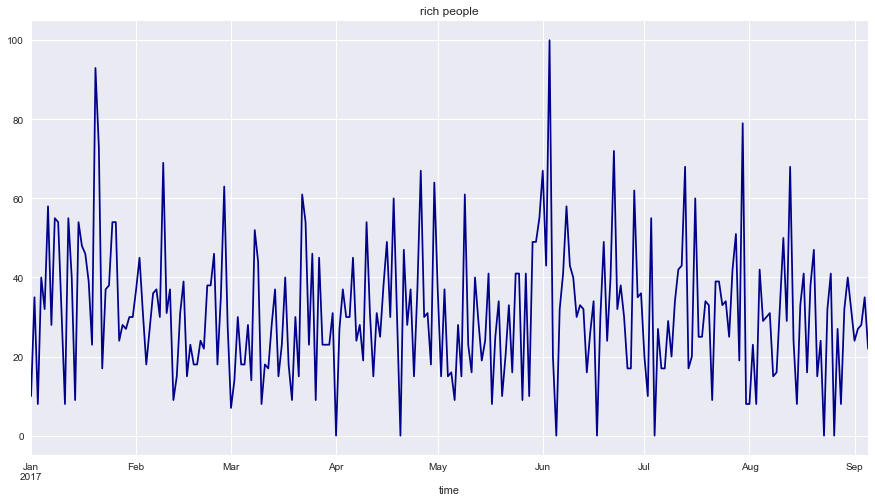

federal deficit


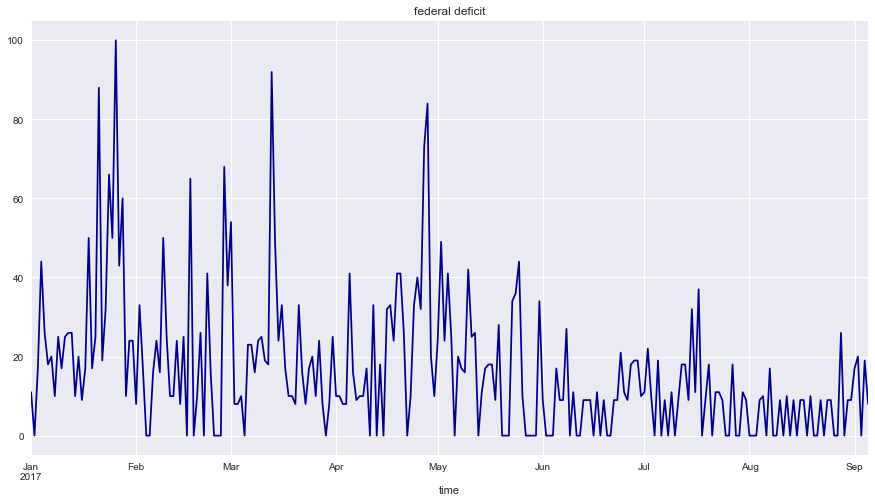

debt clock


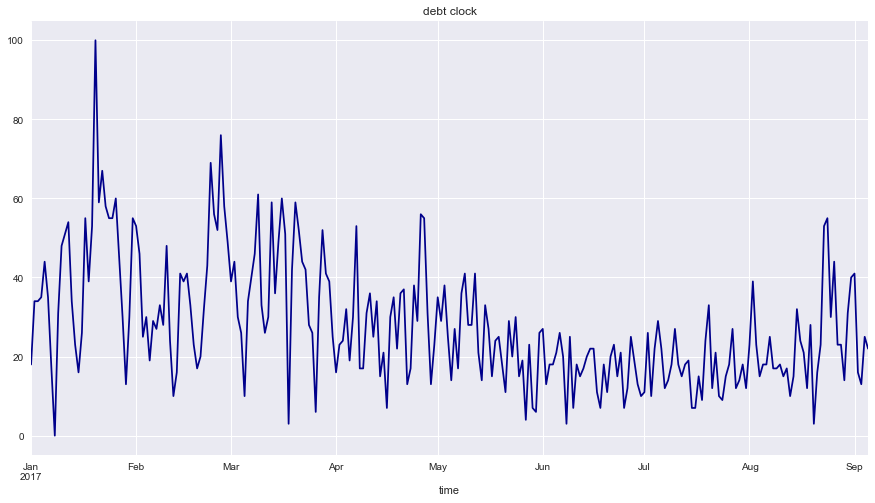

lay off


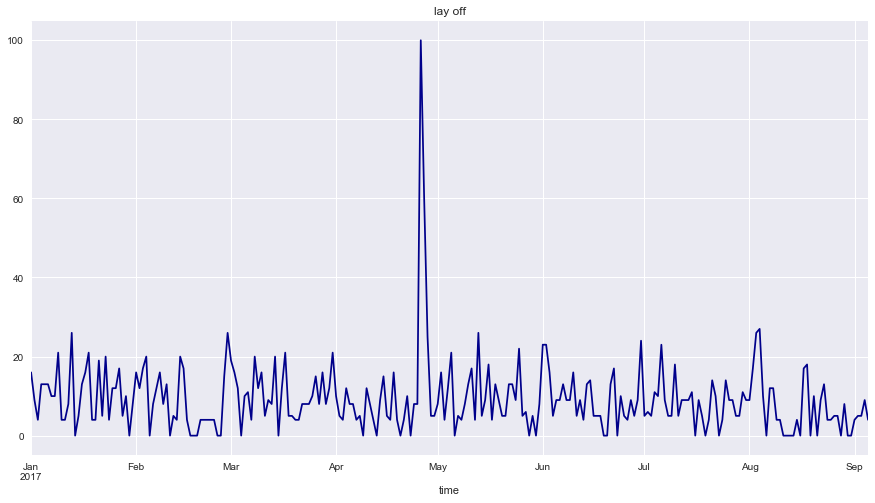

margin


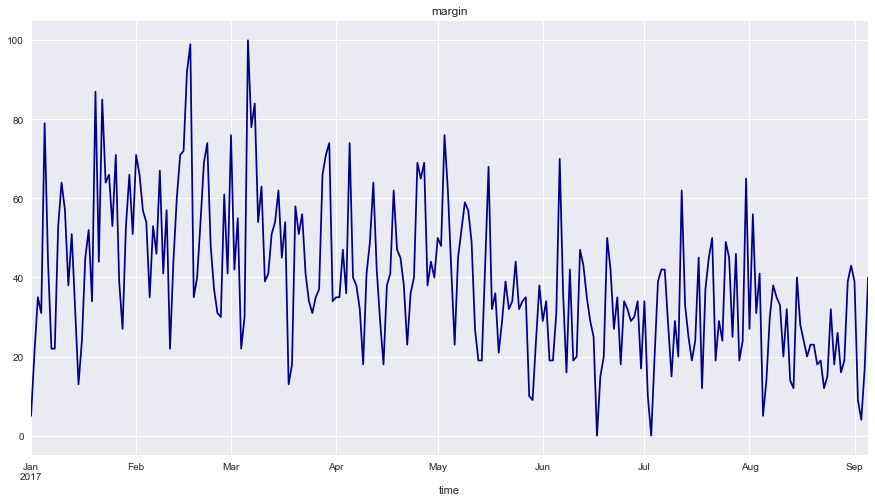

In [95]:
from pandas import Series
a = new_Daily
target = [i-1 for i in [1 ,2,3,4,5,6, 25 ,103]]

for i in target:
    temp = pd.read_json(a[i]).reset_index()
    topic = temp.columns[1]
    print(topic)
    temp.columns = ['time','count']
    count =  np.array(temp['count'])
    count.astype(int)
    pp = Series(count, index= temp.time)
    plt.figure(figsize = (15,8))
    plt.title(str(topic))
    pp.plot(color = 'darkblue')
    plt.show()
# save_date
date = temp.index.tolist()


## Calculate growth rate

In [40]:
def growth_rate(array):
    Array = array[:-1]
    growth = np.zeros(len(array)-1)
    diff = np.diff(array)
    growth[Array != 0] = diff[Array != 0]/Array[Array!=0]
    growth[Array == 0] = 0
    return(growth)

In [270]:
## new weekly 
# transform to growthrate and save:
all_series = {}
mat = np.matrix(np.zeros((len(new_weekly),len(date)-1)))

count = 0


word_name = []
for Json in new_weekly:
    
    array = np.array(pd.read_json(Json).iloc[:,0])
    growth = growth_rate(array)
    j = Json.split(':')[0]
    word = ''.join(w for w in j if w not in punctuation)
    word_name.append(word)
    all_series.update({word:growth})
    mat[count,:] = growth
    count += 1
    
    
# return(all_series)

# return(mat)

In [66]:
## new daily
# transform to growthrate and save:
all_series = {}
#mat = np.matrix(np.zeros((len(new_Daily),len(date)-1)))
mat = np.matrix(np.zeros((len(new_Daily),len(date))))
count = 0


word_name = []
for Json in new_Daily:
    
    array = np.array(pd.read_json(Json).iloc[:,0])
    #growth = growth_rate(array)
    growth = array
    j = Json.split(':')[0]
    word = ''.join(w for w in j if w not in punctuation)
    word_name.append(word)
    all_series.update({word:growth})
    mat[count,:] = growth
    count += 1
    
    
# return(all_series)

# return(mat)

In [87]:
date = [datetime(2017,1,1) + timedelta(i) for i in range(len(array))]


In [96]:
df_all = pd.DataFrame(mat)
df_all = df_all.transpose()
df_all.columns = word_name
df_all.index = date

In [90]:
# save raw data...
df_all.to_csv('df_all_daily_raw.csv',header=True,index=True)

In [58]:
# move to R for clustering 

# save in .mat for matlab

In [162]:
import numpy, scipy.io
with open('words.txt','a') as f:
    for i in ls:
        f.write(i + '\n')
f.close()
scipy.io.savemat('Mat.mat', mdict={'mat': mat})




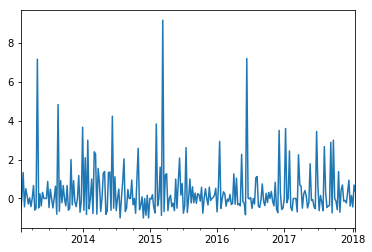

In [276]:
df_all['boom town'].plot()

# Daily 

In [ ]:
## INITIAL COMMENTS ##

# Try to split up search requests to get daily Google Trend data

## SETUP ##
from datetime import datetime, timedelta
from pytrends.request import TrendReq
import pandas as pd
import os

count = 0
empty_word = []
reset_overlap = []
word_dict = []

for word in word_name:
    count += 1 
    print('Start ' + str(count)+ ' : ' + word)
    # The maximum for a timeframe for which we get daily data is 270.
    # Therefore we could go back 269 days. However, since there might
    # be issues when rescaling, e.g. zero entries, we should have an
    # overlap that does not consist of only one period. Therefore,
    # I limit the step size to 250. This leaves 19 periods for overlap.
    maxstep = 269
    overlap = 30
    step    = maxstep - overlap + 1
    kw_list = [word]
    
    start_date = datetime(2014, 1, 1).date()


    ## FIRST RUN ##

    # Login to Google. Only need to run this once, the rest of requests will use the same session.
    pytrend = TrendReq()

    # Run the first time (if we want to start from today, otherwise we need to ask for an end_date as well
    today = datetime(2017,12,31).date()
    old_date = today

    # Go back in time
    new_date = today - timedelta(days=step)

    # Create new timeframe for which we download data
    timeframe = new_date.strftime('%Y-%m-%d')+' '+old_date.strftime('%Y-%m-%d')
    
    query = 0
    pytrend.build_payload(kw_list=kw_list,cat = 16 ,timeframe = timeframe, geo = 'US')
    
   
    
    # sleep 
    time.sleep(randint(5, 10))
    
    interest_over_time_df = pytrend.interest_over_time()
    
     
    # replace 0 into small value
    
    interest_over_time_df.replace(0,0.1, inplace= True)

    ## RUN ITERATIONS

    while new_date>start_date:
        query += 1
        ### Save the new date from the previous iteration.
        # Overlap == 1 would mean that we start where we
        # stopped on the iteration before, which gives us
        # indeed overlap == 1.
        old_date = new_date + timedelta(days=overlap-1)

        ### Update the new date to take a step into the past
        # Since the timeframe that we can apply for daily data
        # is limited, we use step = maxstep - overlap instead of
        # maxstep.
        new_date = new_date - timedelta(days=step)
        # If we went past our start_date, use it instead
        if new_date < start_date:
            new_date = start_date

        # New timeframe
        timeframe = new_date.strftime('%Y-%m-%d')+' '+old_date.strftime('%Y-%m-%d')
        #print(timeframe)

        # Download data
        pytrend.build_payload(kw_list=kw_list,cat = 16 ,timeframe = timeframe, geo = 'US')
        # sleep 
        time.sleep(randint(5, 10))
        
        temp_df = pytrend.interest_over_time()
        
        # replace 0 into 0.1
        temp_df.replace(0,0.1,inplace=True)
                
        
        if (temp_df.empty):
            empty_word = []
            print(word + ' returns empty df')
            #raise ValueError('Google sent back an empty dataframe. Possibly there were no searches at all during the this period! Set start_date to a later date.')
        # Renormalize the dataset and drop last line
        for kw in kw_list:
            beg = new_date
            end = old_date - timedelta(days=1)

            # Since we might encounter zeros, we loop over the
            # overlap until we find a non-zero element
            for t in range(1,overlap+1):
                #print('t = ',t)
                #print(temp_df[kw].iloc[-t])
                if temp_df[kw].iloc[-t] != 0:
                    scaling = interest_over_time_df[kw].iloc[t-1]/temp_df[kw].iloc[-t]
                    #print('Found non-zero overlap!')
                    break
                elif t == overlap:
                    print('Did not find non-zero overlap, set scaling to zero! Increase Overlap!')
                    reset_overlap.append(word)
                    
                    scaling = 0
            # Apply scaling
            temp_df.loc[beg:end,kw]=temp_df.loc[beg:end,kw]*scaling
        interest_over_time_df = pd.concat([temp_df[:-overlap],interest_over_time_df])

    # Save dataset
    word_dict.append(interest_over_time_df.iloc[:,:1].to_json())
    # sleep
    time.sleep(randint(5, 10))
    
    print('Finished ' + str(count)+ ' : ' + word, '. Queries : ' + str(query))